In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from IPython.display import HTML

In [ ]:
!pip install split-folders


In [ ]:
cd /content/drive/MyDrive


/content/drive/MyDrive


In [ ]:
ls

'cassava brown streak detector.rar'   dataset/       'Rating School Life form.gform'
'Colab Notebooks'/                    New/           'Rating School Life form (Responses).gsheet'
 data/                                PlantVillage/


In [ ]:
!split_folders --output dataset --ratio .7 .1 .2 -- PlantVillage

Copying files: 566 files [02:30,  3.77 files/s]


In [ ]:
ls

'cassava brown streak detector.rar'   dataset/       'Rating School Life form.gform'
'Colab Notebooks'/                    New/           'Rating School Life form (Responses).gsheet'
 data/                                PlantVillage/


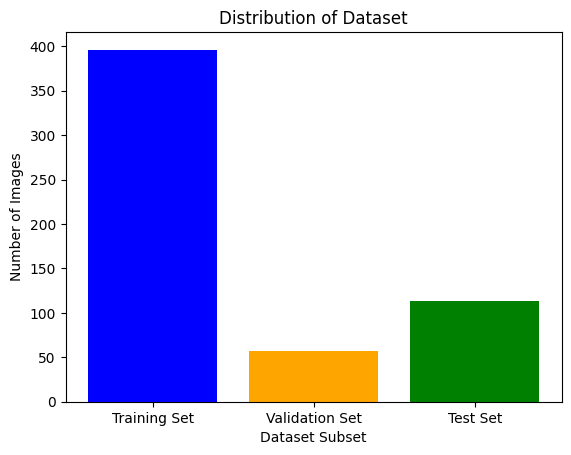

In [ ]:
import matplotlib.pyplot as plt

# Data distribution
data_split = {
    'Training Set': 396.2,
    'Validation Set': 56.6,
    'Test Set': 113.2
}

# Plotting the distribution
fig, ax = plt.subplots()
ax.bar(data_split.keys(), data_split.values(), color=['blue', 'orange', 'green'])
ax.set_xlabel('Dataset Subset')
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Dataset')

plt.show()


In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS=50

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)

# Calculate steps per epoch based on actual data available
steps_per_epoch = train_generator.samples // BATCH_SIZE
print(steps_per_epoch)


Found 395 images belonging to 2 classes.
12


In [ ]:
train_generator.class_indices

{'brown_streak': 0, 'healthy1': 1}

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['brown_streak', 'healthy1']

In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break


[[[0.5137255  0.54090875 0.41238838]
  [0.5197181  0.5589338  0.4241023 ]
  [0.5575547  0.6012141  0.4521095 ]
  ...
  [0.15372819 0.16941446 0.07137524]
  [0.15409222 0.1697785  0.07173928]
  [0.15445626 0.17014255 0.07210331]]

 [[0.5137255  0.53908855 0.41129628]
  [0.5182619  0.5574776  0.4230102 ]
  [0.550638   0.5932052  0.44701296]
  ...
  [0.15840289 0.17408916 0.07759007]
  [0.15913096 0.17481723 0.07904623]
  [0.15985905 0.17554532 0.08050238]]

 [[0.5137255  0.53726834 0.41020414]
  [0.51680577 0.55602145 0.42191803]
  [0.5437213  0.5851964  0.44191644]
  ...
  [0.16470589 0.18039216 0.08868983]
  [0.16470589 0.18039216 0.08796174]
  [0.16470589 0.18039216 0.08723366]]

 ...

 [[0.6499363  0.74213564 0.69359565]
  [0.65212053 0.7428637  0.6946878 ]
  [0.65430474 0.74359185 0.69577986]
  ...
  [0.21256806 0.1201126  0.07230064]
  [0.58792    0.5229359  0.44121054]
  [0.5036959  0.4730835  0.35467628]]

 [[0.7048687  0.77902603 0.74166095]
  [0.7117854  0.7841226  0.74821365]


In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 55 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 116 images belonging to 2 classes.


In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5131791  0.48718753 0.44505313]
  [0.5159945  0.49056593 0.44730538]
  [0.5188098  0.49394432 0.44955766]
  ...
  [0.29607838 0.26778707 0.2630252 ]
  [0.25824514 0.23471573 0.23471573]
  [0.25827715 0.23474777 0.23474777]]

 [[0.5010392  0.47358823 0.43437254]
  [0.5021653  0.47471437 0.43549868]
  [0.5032915  0.4758405  0.43662483]
  ...
  [0.28819543 0.26103026 0.25739452]
  [0.25655594 0.23302653 0.23302653]
  [0.2610925  0.2375631  0.2375631 ]]

 [[0.48375356 0.45154068 0.41470593]
  [0.48713195 0.45604524 0.4186474 ]
  [0.49051037 0.46054977 0.42258888]
  ...
  [0.28031248 0.25427344 0.25176382]
  [0.25486672 0.23133734 0.23133734]
  [0.26390785 0.24037844 0.24037844]]

 ...

 [[0.7892393  0.7631244  0.7264076 ]
  [0.92741984 0.8987087  0.8542407 ]
  [0.6727927  0.6348318  0.58934206]
  ...
  [0.15576507 0.10462755 0.10211793]
  [0.1535128  0.10406448 0.10042872]
  [0.15126054 0.10350141 0.09873952]]

 [[0.83428484 0.808733   0.7697638 ]
  [0.8975773  0.8666138  0.823272  ]


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
#train
395/32

12.34375

In [ ]:
#validation
55/32

1.71875

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=12,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
12/12 [==============================] - 58s 5s/step - loss: 0.6311 - accuracy: 0.5868 - val_loss: 0.4820 - val_accuracy: 0.6562
Epoch 2/50
12/12 [==============================] - 50s 4s/step - loss: 0.3960 - accuracy: 0.7961 - val_loss: 0.4844 - val_accuracy: 0.7188
Epoch 3/50
12/12 [==============================] - 50s 4s/step - loss: 0.3077 - accuracy: 0.8760 - val_loss: 0.4123 - val_accuracy: 0.8438
Epoch 4/50
12/12 [==============================] - 54s 4s/step - loss: 0.3043 - accuracy: 0.8650 - val_loss: 0.5253 - val_accuracy: 0.7500
Epoch 5/50
12/12 [==============================] - 51s 4s/step - loss: 0.2479 - accuracy: 0.8981 - val_loss: 0.2767 - val_accuracy: 0.8750
Epoch 6/50
12/12 [==============================] - 55s 5s/step - loss: 0.2276 - accuracy: 0.8984 - val_loss: 0.2567 - val_accuracy: 0.8750
Epoch 7/50
12/12 [==============================] - 55s 4s/step - loss: 0.2257 - accuracy: 0.9062 - val_loss: 0.2822 - val_accuracy: 0.8438
Epoch 8/50
12/12 [==

In [ ]:
scores = model.evaluate(test_generator)

4/4 [==============================] - 9s 2s/step - loss: 0.2361 - accuracy: 0.8793


4/4 [==============================] - 12s 3s/step


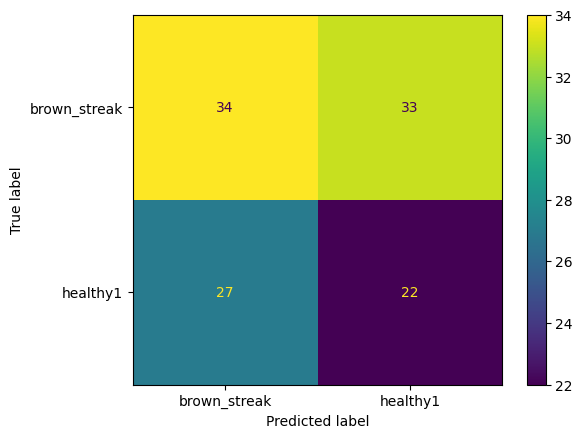

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
test_pred = model.predict(test_generator)
test_pred_classes = np.argmax(test_pred, axis=1)
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, test_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_names)
cmd.plot()
plt.show()


In [ ]:
scores

[0.06390205770730972, 0.9741379022598267]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 12}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['loss'])

50

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_acc

[0.71875,
 0.6875,
 0.75,
 0.75,
 0.875,
 0.8125,
 0.8125,
 0.75,
 0.8125,
 0.8125,
 0.84375,
 0.84375,
 0.875,
 0.8125,
 0.8125,
 0.8125,
 0.84375,
 0.875,
 0.84375,
 0.875,
 0.84375,
 0.90625,
 0.875,
 0.875,
 0.90625,
 0.84375,
 0.875,
 0.84375,
 0.84375,
 0.84375,
 0.84375,
 0.9375,
 0.875,
 0.875,
 0.90625,
 0.84375,
 0.90625,
 0.90625,
 0.78125,
 0.9375,
 0.90625,
 0.84375,
 0.9375,
 0.8125,
 0.875,
 0.9375,
 0.875,
 0.875,
 0.84375,
 0.84375]

In [ ]:
acc

[0.6363636255264282,
 0.8732782602310181,
 0.8787878751754761,
 0.8842975497245789,
 0.8787878751754761,
 0.8925619721412659,
 0.8953167796134949,
 0.8980716466903687,
 0.9118457436561584,
 0.9118457436561584,
 0.9118457436561584,
 0.9146005511283875,
 0.9146005511283875,
 0.9201101660728455,
 0.9283746480941772,
 0.944903552532196,
 0.9256198406219482,
 0.9311294555664062,
 0.9296875,
 0.936639130115509,
 0.9476584196090698,
 0.9479166865348816,
 0.9476584196090698,
 0.942148745059967,
 0.9559228420257568,
 0.9614325165748596,
 0.9752066135406494,
 0.9724518060684204,
 0.9724518060684204,
 0.9724518060684204,
 0.93388432264328,
 0.936639130115509,
 0.939393937587738,
 0.942148745059967,
 0.9641873240470886,
 0.9669421315193176,
 0.9862259030342102,
 0.9779614210128784,
 0.9696969985961914,
 0.9669421315193176,
 0.9765625,
 0.9779614210128784,
 0.9834710955619812,
 0.9917355179786682,
 0.9834710955619812,
 0.9834710955619812,
 0.9834710955619812,
 0.9917355179786682,
 0.994490385055542

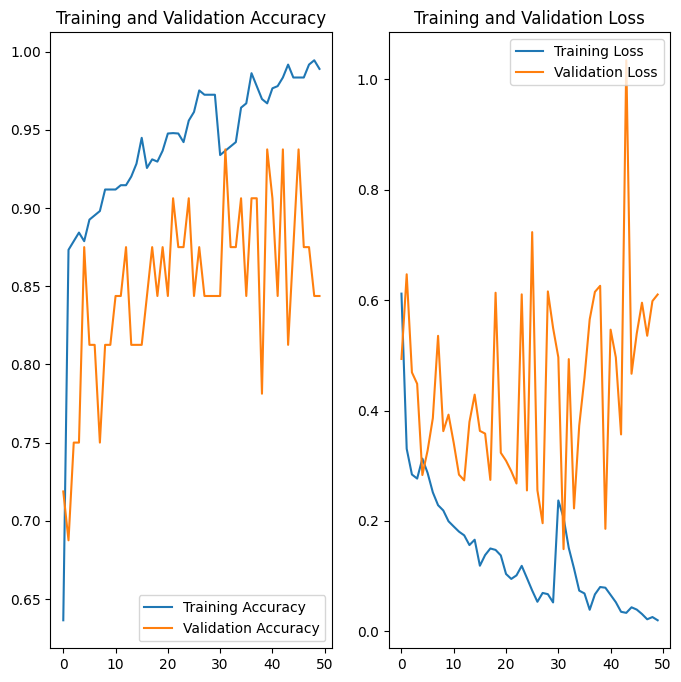

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: brown_streak
1/1 [==============================] - 0s 158ms/step
predicted label: brown_streak


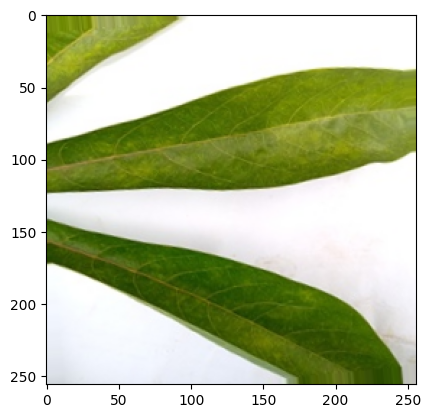

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


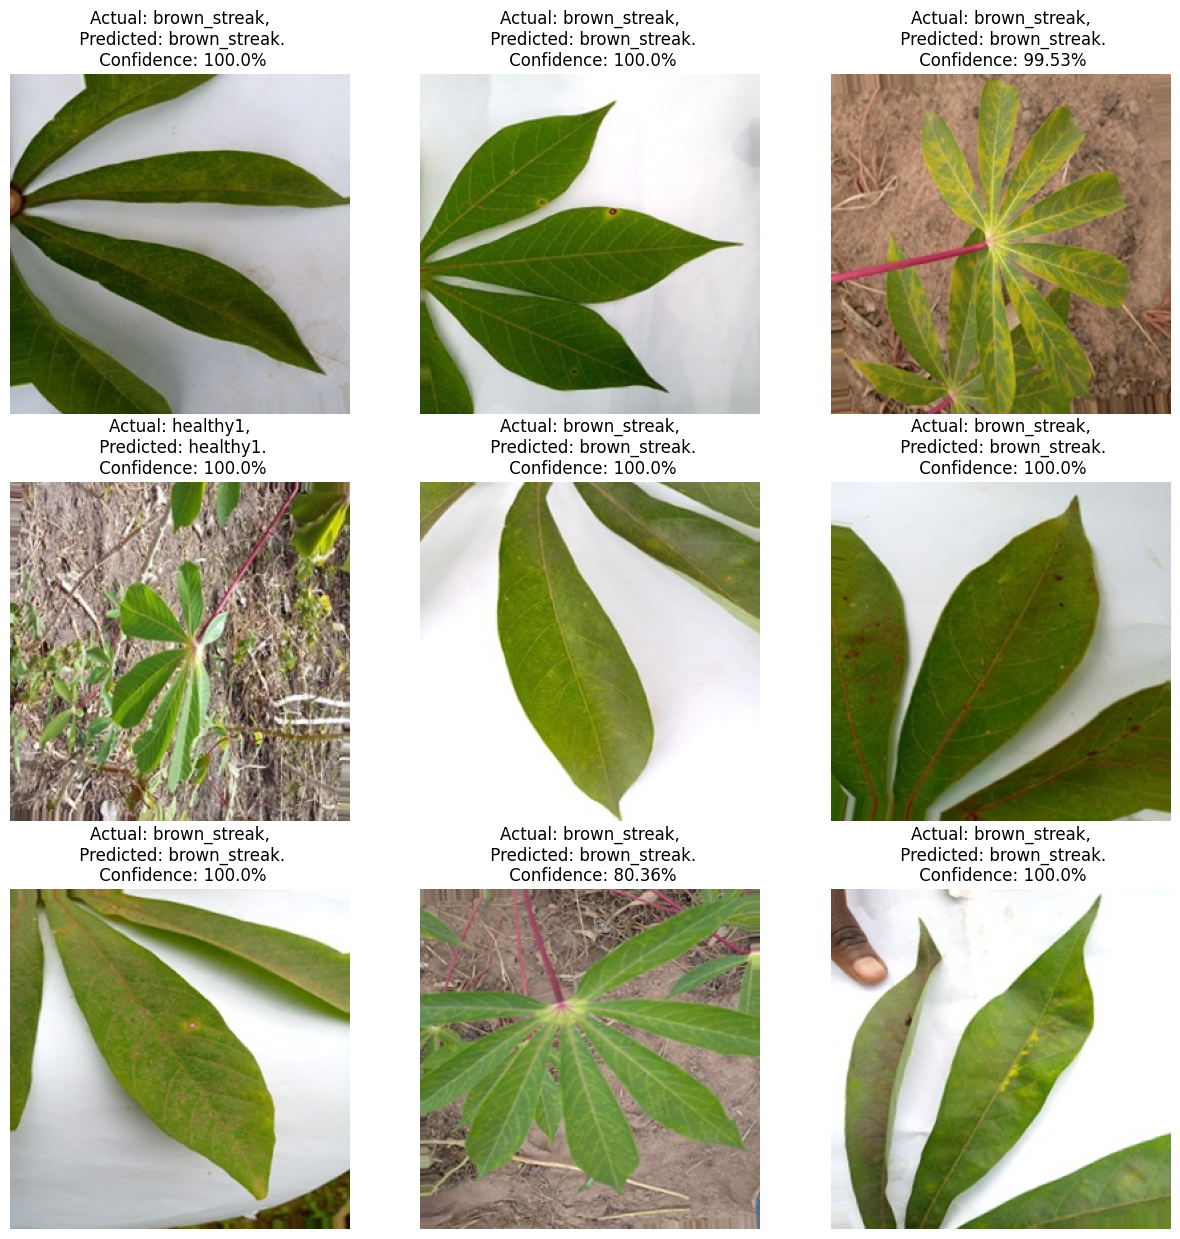

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [ ]:
model.save("/content/drive/MyDrive/data2/cassavaBrownStreak.h5")

In [ ]:
!pip install pyngrok

In [ ]:
! curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok

deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://ngrok-agent.s3.amazonaws.com buster InRelease [20.3 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ngrok-agent.s3.amazonaws.com buster/main amd64 Packages [4,389 B]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,125 kB]
Hit:13 https://ppa.launc

In [ ]:
!pip install flask-cors


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
import tensorflow as tf

model_new = tf.keras.models.load_model("/content/drive/MyDrive/data/cassavaBrownStreak.h5")
model_new.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [ ]:
!ngrok authtoken 2gJiTTSTFqsLSX6fTKH3KigEpV7_25mXKrKeAa17wWBXsvRyP


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS  # Add this import
import numpy as np
import tensorflow as tf
from PIL import Image
from io import BytesIO
import base64
from pyngrok import ngrok

app = Flask(__name__)
CORS(app)  # Enable CORS

# Load your model
model = tf.keras.models.load_model("/content/drive/MyDrive/data/cassavaBrownStreak.h5")
class_names = ['brown_streak', 'Healthy']

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image uploaded'}), 400

    uploaded_file = request.files['image']
    image = Image.open(uploaded_file.stream)
    image = image.resize((256, 256))
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    predictions = model.predict(image_array)
    response = {
        'prediction': {
            'class': class_names[np.argmax(predictions[0])],
            'confidence': round(100 * np.max(predictions[0]), 2)
        }
    }
    return jsonify(response)

if __name__ == '__main__':
    ngrok_tunnel = ngrok.connect(5000)
    print('ngrok tunnel "{}" -> "http://127.0.0.1:5000"'.format(ngrok_tunnel.public_url))
    app.run(port=5000)


ngrok tunnel "https://b262-34-125-42-101.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 [==============================] - 2s 2s/step


INFO:werkzeug:127.0.0.1 - - [27/May/2024 17:58:35] "POST /predict HTTP/1.1" 200 -
